In [1]:
import os
import pathlib

if pathlib.Path(os.curdir).resolve().name != "DeepAWB":
    os.chdir("..")

In [2]:
import ipywidgets as widgets
from IPython.display import display

preprocess_option_to_DIR = {"Unprocessed": "PNG", "MLE": "PROCESSED_MLE", "Uniform": "PROCESSED_UNIFORM"}

preprocess_dropdown = widgets.Dropdown(
    options=list(preprocess_option_to_DIR.keys()),
    value=list(preprocess_option_to_DIR.keys())[1],
    description="Select the preprocessing type:",
    disabled=False,
)

selected_option = preprocess_dropdown.value


def on_preprocess_dropdown_change(change):
    global selected_option
    selected_option = change["new"]


preprocess_dropdown.observe(on_preprocess_dropdown_change, names="value")


set_dropdown = widgets.Dropdown(
    options=["train", "test"],
    value="train",
    description="Select the dataset part:",
    disabled=False,
)

images_set = set_dropdown.value


def on_set_dropdown_change(change):
    global images_set
    images_set = change["new"]


set_dropdown.observe(on_set_dropdown_change, names="value")


display(preprocess_dropdown, set_dropdown)

Dropdown(description='Select the preprocessing type:', index=1, options=('Unprocessed', 'MLE', 'Uniform'), val…

Dropdown(description='Select the dataset part:', options=('train', 'test'), value='train')

In [3]:
import importlib

import src.deep_awb.data_loaders as data_loaders

importlib.reload(data_loaders)


image_scale = 1
data_loaders.SimpleCubePPDatasetInfo.setup(image_scale)


if images_set == "train":
    dataset = data_loaders.get_train_dataset()
elif images_set == "test":
    dataset = data_loaders.get_test_dataset()
else:
    raise ValueError(f"Unknown images_set: {images_set}")

dataset.transform

/Users/mrkorch/micromamba/envs/ai/lib/python3.12/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.15 (you have 1.4.14). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


Compose([
  Resize(p=1.0, height=432, width=648, interpolation=1),
  Compose([
    Affine(p=0.75, interpolation=1, mask_interpolation=0, cval=0.0, mode=0, scale={'x': (0.9, 1.1), 'y': (0.9, 1.1)}, translate_percent={'x': (0.1, 0.1), 'y': (0.1, 0.1)}, translate_px=None, rotate=(15.0, 15.0), fit_output=False, shear={'x': (0.0, 0.0), 'y': (0.0, 0.0)}, cval_mask=0.0, keep_ratio=False, rotate_method='largest_box', balanced_scale=False),
    Perspective(p=0.5, scale=(0.05, 0.1), keep_size=True, pad_mode=0, pad_val=0.0, mask_pad_val=0.0, fit_output=False, interpolation=1),
    HorizontalFlip(p=0.5),
    VerticalFlip(p=0.25),
    GaussianBlur(p=0.8, blur_limit=(3, 7), sigma_limit=(0, 0)),
    MotionBlur(p=0.8, blur_limit=(3, 7), allow_shifted=True),
    RandomBrightnessContrast(p=0.75, brightness_limit=(-0.1, 0.1), contrast_limit=(-0.2, 0.2), brightness_by_max=True),
    GaussNoise(p=0.5, var_limit=(0, 0.001), per_channel=False, mean=0.0, noise_scale_factor=1.0),
  ], p=1.0, bbox_params=None, 

In [4]:
from src import DATASET_DIR

images_dir = DATASET_DIR / images_set / preprocess_option_to_DIR[selected_option]
images = list(images_dir.iterdir())

In [5]:
from torchvision.transforms.functional import to_pil_image

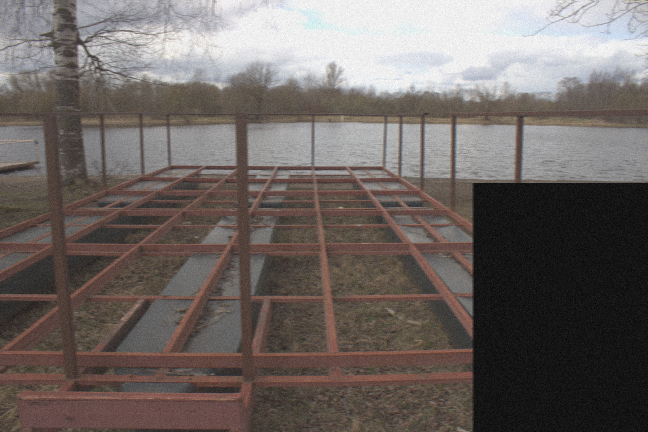

In [6]:
import random

image_path = random.choice(images)

image = data_loaders.load_processable_image(image_path, dataset.transform)
to_pil_image(image)